In [29]:
%matplotlib inline
import math
import pandas as pd
import pylab as p
alpha = 0.05
unordered_nominal_columns = ['Most_Important_Issue', 'Main_transportation', 'Occupation']


def convert_to_bool(df, *column_names):
    for column_name in column_names:
        df[column_name] = df[column_name].map(lambda x: 1 if x == "Yes" else (0 if x == 'No' else None))


def identify_and_set_correct_types(df):
    # boolean columns: Looking_at_poles_results Married Will_vote_only_large_party Financial_agenda_matters Voting_Time Gender
    convert_to_bool(df, 'Looking_at_poles_results', 'Married', 'Will_vote_only_large_party', 'Financial_agenda_matters')
    df['Gender'] = df['Gender'].map(lambda x: 1 if x == 'Male' else (0 if x == 'Female' else None))

    # Ordered nominal columns: Age_group
    df['Age_group'] = df['Age_group'].map(lambda x: 1 if x == "Below_30" else (2 if x == "30-45" else (3 if x == "45_and_up" else None)))
    df['Age_group'] = df['Age_group'].astype('category', ordered=True)
    df['Voting_Time'] = df['Voting_Time'].map(lambda x: 1 if x == 'By_16:00' else (2 if x == 'After_16:00' else None))
    df['Voting_Time'] = df['Voting_Time'].astype('category', ordered=True)

#     for col in unordered_nominal_columns:
#         df[col] = df[col].astype('category', ordered=False)

    return df


def nominal_to_numeric(df):
    # we are losing the missing data here
    for col in unordered_nominal_columns:
        partial = pd.get_dummies(df[col], col, '_')
        df = df.join(partial)
        del df[col]
    return df


def print_missing_values(df):
    print '\n\nMissing values:'
    for col in df.columns.values:
        misCount = df[col].isnull().sum()
        if misCount > 0:
            print '%s: %s missing values' % (col, misCount)

def plot_log_density_function(df, column):
    plot_density_function(df, column, lambda x: math.log(x))


def plot_density_function(df, column, trans=lambda x: x):
    df[column].plot(kind='kde')    
    # p.savefig('foo.png')
    # p.clf()
    p.show()


In [30]:
df = pd.read_csv('./dataset/ElectionsData.csv')
df.dropna(inplace=True)
df.describe()


,Occupation_Satisfaction,Avg_monthly_expense_when_under_age_21,AVG_lottary_expanses,Avg_Residancy_Altitude,Yearly_ExpensesK,Financial_balance_score_(0-1),%Of_Household_Income,Avg_government_satisfaction,Avg_education_importance,Avg_environmental_importance,...,Avg_size_per_room,Weighted_education_rank,%_satisfaction_financial_policy,Garden_sqr_meter_per_person_in_residancy_area,Last_school_grades,Number_of_differnt_parties_voted_for,Political_interest_Total_Score,Number_of_valued_Kneset_members,Overall_happiness_score,Num_of_kids_born_last_10_years
count,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,...,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000
mean,5.521180,444.880470,74052.534755,148.293490,506.570169,0.503743,0.497976,4.979805,4.980646,4.945780,...,24.767447,819001.020307,50.095022,34272.714537,72.864838,1.994368,952.243446,10.481268,680.223839,0.689765
std,2.869735,330.340002,61917.142758,110.113334,172.404935,0.288324,0.286469,2.892392,2.898338,2.889963,...,3.230392,341495.930621,28.884903,55711.588576,20.197879,1.267355,178.224152,5.771570,154.123060,1.075221
min,1.000000,-394.030092,-81744.489527,-131.343364,0.349801,0.000193,0.000021,0.000616,0.000258,0.000580,...,1.070541,524.288150,0.005066,13.097572,30.000000,0.000000,29.055030,1.000000,3.153985,0.000000
25%,3.000000,196.448728,30020.492226,65.482909,402.951062,0.255969,0.249368,2.452850,2.467503,2.439931,...,23.956869,659876.831126,25.137525,4389.120819,60.000000,1.000000,875.080861,5.000000,610.799487,0.000000
50%,6.000000,365.139384,57808.027114,121.713128,445.945615,0.504244,0.496565,4.978188,4.944264,4.956069,...,24.674333,742475.977090,50.486613,14953.597901,70.000000,2.000000,945.740652,11.000000,680.964899,0.000000
75%,8.000000,622.052593,100501.179351,207.350864,596.617700,0.752151,0.742686,7.452653,7.523308,7.394469,...,25.896559,900862.356499,75.147797,43211.732016,90.000000,3.000000,1022.346527,15.000000,771.114540,1.000000
max,10.000000,2290.716172,640346.644820,763.572057,1000.000000,0.999966,0.999926,9.999888,9.999543,9.999985,...,31.622777,2002009.297226,99.974064,583815.858711,100.000000,7.000000,1499.648613,20.000000,999.999049,10.000000


#### Remove not possible values

In [31]:
df=df[df['Avg_monthly_expense_when_under_age_21']>=0]
df=df[df['AVG_lottary_expanses']>=0]
df.describe()

,Occupation_Satisfaction,Avg_monthly_expense_when_under_age_21,AVG_lottary_expanses,Avg_Residancy_Altitude,Yearly_ExpensesK,Financial_balance_score_(0-1),%Of_Household_Income,Avg_government_satisfaction,Avg_education_importance,Avg_environmental_importance,...,Avg_size_per_room,Weighted_education_rank,%_satisfaction_financial_policy,Garden_sqr_meter_per_person_in_residancy_area,Last_school_grades,Number_of_differnt_parties_voted_for,Political_interest_Total_Score,Number_of_valued_Kneset_members,Overall_happiness_score,Num_of_kids_born_last_10_years
count,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,...,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000
mean,5.522956,446.468968,74321.716110,148.822989,506.541709,0.503540,0.498063,4.982672,4.979372,4.945439,...,24.766381,818976.248267,50.108953,34356.545844,72.838203,1.994108,952.181322,10.479254,680.166733,0.689786
std,2.870142,329.330048,61774.731444,109.776683,172.418320,0.288304,0.286474,2.892573,2.899884,2.889516,...,3.233278,341751.947436,28.891508,55763.009320,20.203327,1.266159,178.385937,5.771939,154.175791,1.075030
min,1.000000,3.988911,44.957092,1.329637,0.349801,0.000193,0.000021,0.000616,0.000258,0.000580,...,1.070541,524.288150,0.005066,13.097572,30.000000,0.000000,29.055030,1.000000,3.153985,0.000000
25%,3.000000,198.312808,30209.803690,66.104269,403.090898,0.255858,0.249304,2.460754,2.466062,2.440019,...,23.957544,659979.428242,25.176596,4445.878947,60.000000,1.000000,875.068070,5.000000,610.950290,0.000000
50%,6.000000,366.621173,57927.372083,122.207058,445.909060,0.503419,0.496640,4.983254,4.943491,4.956069,...,24.673545,742408.532152,50.469529,15066.772072,70.000000,2.000000,945.653768,11.000000,680.877369,0.000000
75%,8.000000,623.146085,100656.179475,207.715362,596.228952,0.752043,0.742688,7.458120,7.522793,7.394158,...,25.892530,900211.299493,75.171680,43363.387509,90.000000,3.000000,1022.235209,15.000000,770.758095,1.000000
max,10.000000,2290.716172,640346.644820,763.572057,1000.000000,0.999966,0.999926,9.999888,9.999543,9.999985,...,31.622777,2002009.297226,99.974064,583815.858711,100.000000,7.000000,1499.648613,20.000000,999.999049,10.000000


In [32]:
import numpy as np
# Identify which of the orginal features are objects
ObjFeat=df.keys()[df.dtypes.map(lambda x: x=='object')]

# Transform the original features to categorical
# Creat new 'int' features, resp.

for f in ObjFeat:
    df[f] = df[f].astype("category")
    df[f+"Int"] = df[f].cat.rename_categories(range(df[f].nunique())).astype(int)
    df.loc[df[f].isnull(), f+"Int"] = np.nan #fix NaN conversion
    df[f]=df[f+"Int"]
    del df[f+"Int"]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8146 entries, 0 to 9998
Data columns (total 38 columns):
Vote                                             8146 non-null float64
Occupation_Satisfaction                          8146 non-null float64
Avg_monthly_expense_when_under_age_21            8146 non-null float64
AVG_lottary_expanses                             8146 non-null float64
Most_Important_Issue                             8146 non-null float64
Avg_Residancy_Altitude                           8146 non-null float64
Looking_at_poles_results                         8146 non-null float64
Yearly_ExpensesK                                 8146 non-null float64
Married                                          8146 non-null float64
Gender                                           8146 non-null float64
Voting_Time                                      8146 non-null float64
Financial_balance_score_(0-1)                    8146 non-null float64
%Of_Household_Income                     

### Convert to Numpy array

In [34]:
df_X_noNaN = df.drop(['Vote'], axis=1).values
df_Y_noNaN = df.Vote.values

## Filters (Features Selection)

In [35]:
all_features = list(df.columns)
all_features.remove('Vote')
features_to_keep=[]

### Applying chi2 for nominal values:

In [36]:
from sklearn.feature_selection import chi2
v=chi2(df_X_noNaN, df_Y_noNaN)[1]
i=0
for c in all_features:
    if c in ObjFeat:
        print  str(v[i]) +": " + c
        if v[i]<alpha:
            features_to_keep.append(c)            
    i+=1

0.0: Most_Important_Issue
0.0: Looking_at_poles_results
2.11157371268e-116: Married
0.979486951977: Gender
0.543189363847: Voting_Time
2.5239068613e-76: Will_vote_only_large_party
0.628214501735: Age_group
0.25193533582: Main_transportation
0.0657004618364: Occupation
0.0: Financial_agenda_matters


In [37]:
features_to_keep

['Most_Important_Issue',
 'Looking_at_poles_results',
 'Married',
 'Will_vote_only_large_party',
 'Financial_agenda_matters']

### Now we would like to apply ANOVA for the numeric values
but we should first convert them to normal

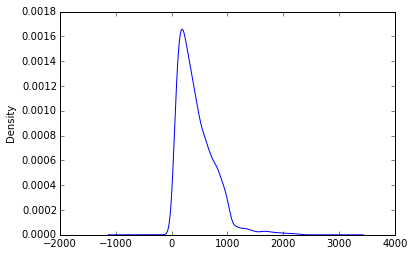

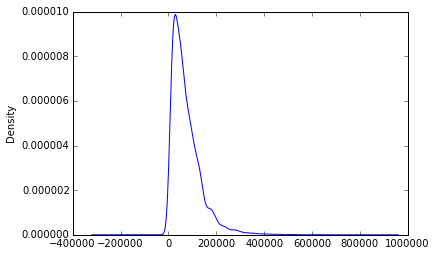

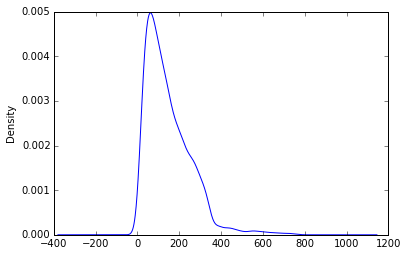

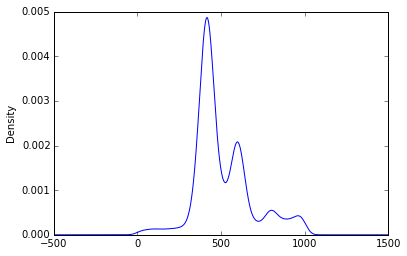

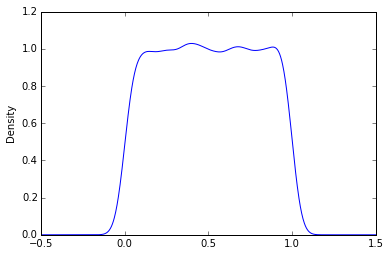

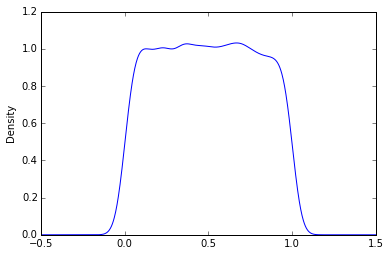

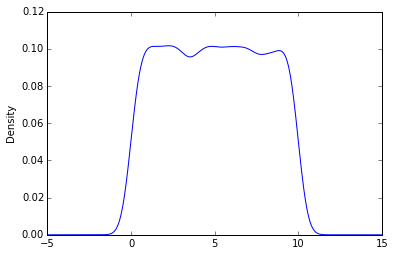

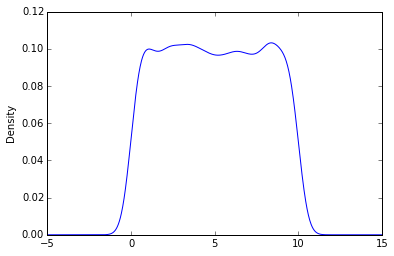

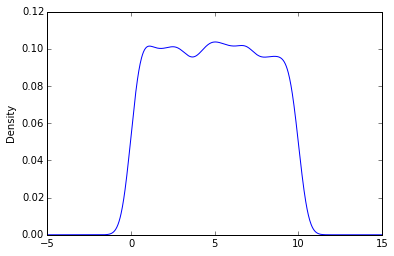

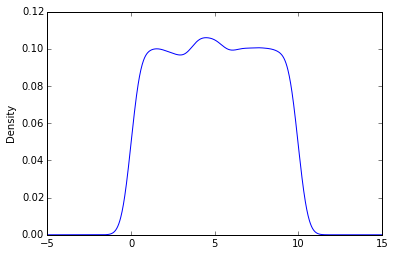

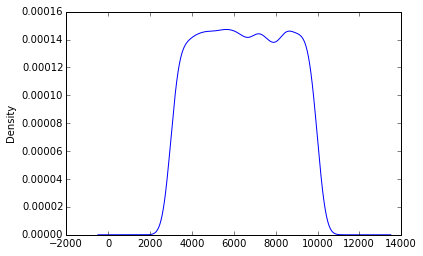

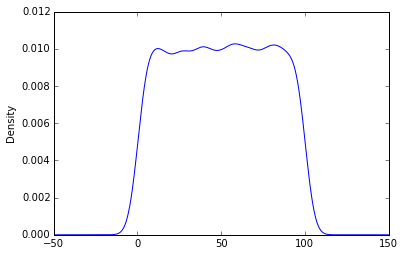

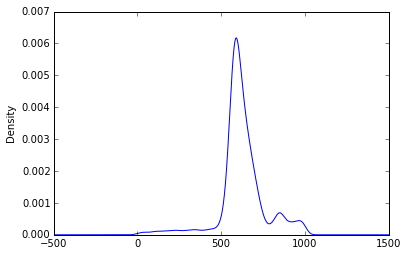

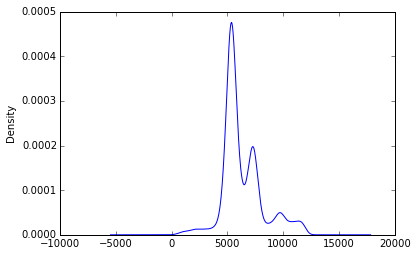

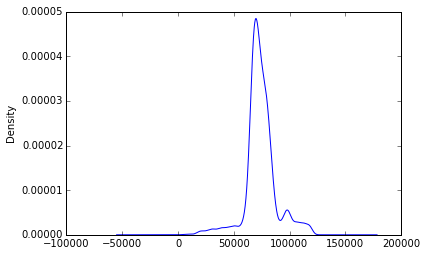

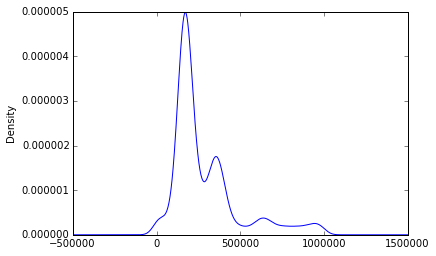

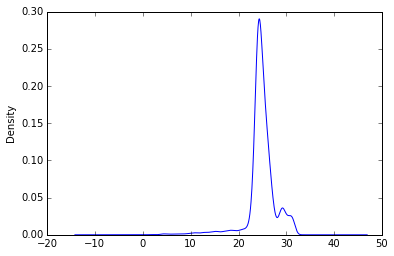

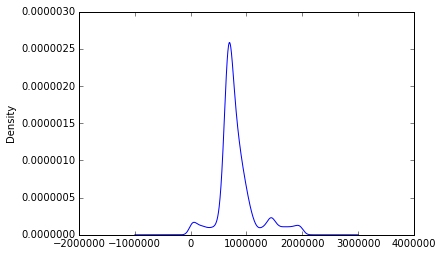

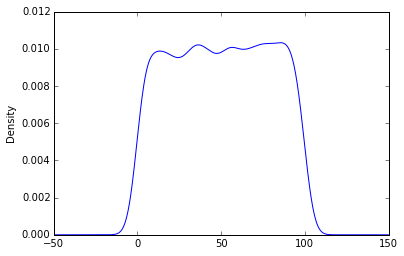

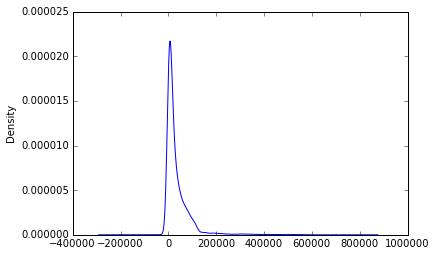

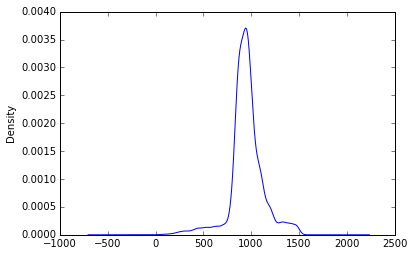

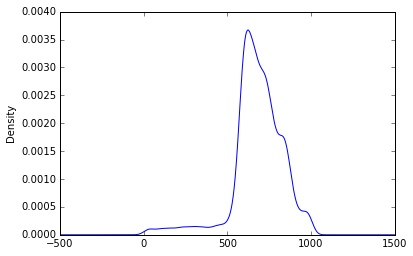

In [38]:
discrete_features = [c for c in df.columns if len(df[c].unique())<=20 and c!='Vote'] # nominal features and some numeric features, like Last_school_grades
for c in all_features:
    if c not in discrete_features:
        plot_density_function(df,c)

Some features are distributed uniformly. Sor the others normal distribution should be a good enough approximation.
#### Testing for normal distribution:

In [39]:
import scipy
from scipy.stats import norm, kstest
from sklearn.preprocessing import Imputer, MinMaxScaler
continuous_features = [f for f in all_features if f not in discrete_features]
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[continuous_features].dropna()), columns=continuous_features)
uniform = set()
alpha = 0.05
for c in continuous_features:    
    statistic, pvalue = kstest(df_scaled[c], scipy.stats.uniform().cdf)
    if statistic < alpha:
        uniform.add(c)

In [40]:
dfNormal = df.copy()
zero_to_one = [f for f in uniform if dfNormal[f].min()>0 and dfNormal[f].min()<0.001 and dfNormal[f].max()<1 and dfNormal[f].max()>0.999]
zero_to_ten = [f for f in uniform if dfNormal[f].min()>0 and dfNormal[f].min()<0.01 and dfNormal[f].max()<10 and dfNormal[f].max()>9.99]
zero_to_hundred = [f for f in uniform if dfNormal[f].min()>0 and dfNormal[f].min()<0.1 and dfNormal[f].max()<100 and dfNormal[f].max()>99.9]
for f in uniform:    
    min= 0 if f in zero_to_one or f in zero_to_ten or f in zero_to_hundred else dfNormal[f].min()
    max= 1 if f in zero_to_one else (10 if f in zero_to_ten else 100 if f in zero_to_hundred else dfNormal[f].max())
#     print f + " max: "+str(max) + " min: " +str(min) + " max-min: " + str(max-min)
    dfNormal[f+"Normal"] = dfNormal[f].map(lambda x: norm.ppf((x-min)/(max-min)))     


#### getting rid of infinite values, we can't handle them, so we'll use the next best thing

In [41]:
dfNormal.replace([np.inf,-np.inf], np.nan, inplace=True)
dfNormal.dropna(inplace=True)

In [42]:
df_X_normal_dis_noNaN = dfNormal.drop(['Vote'], axis=1).values
df_Y_normal_dis_noNaN = dfNormal.Vote.values

In [43]:
import sklearn
v=sklearn.feature_selection.f_classif(df_X_normal_dis_noNaN, df_Y_normal_dis_noNaN)[1]
i=0
for c in dfNormal.drop(['Vote'], axis=1).columns:
    if c not in ObjFeat:        
        print  str(v[i]) + ": " + c
        if v[i]<alpha:
            features_to_keep.append(c)            
    i+=1

0.100693168585: Occupation_Satisfaction
0.0: Avg_monthly_expense_when_under_age_21
0.0: AVG_lottary_expanses
0.0: Avg_Residancy_Altitude
0.0: Yearly_ExpensesK
0.846728099524: Financial_balance_score_(0-1)
0.318710955397: %Of_Household_Income
0.862299973271: Avg_government_satisfaction
0.661388235488: Avg_education_importance
0.904688082309: Avg_environmental_importance
0.456383472379: Avg_Satisfaction_with_previous_vote
0.316059150192: Avg_monthly_income_all_years
0.954652796041: %Time_invested_in_work
0.0: Yearly_IncomeK
0.0: Avg_monthly_expense_on_pets_or_plants
0.0: Avg_monthly_household_cost
0.0: Phone_minutes_10_years
0.0: Avg_size_per_room
0.0: Weighted_education_rank
0.152592065529: %_satisfaction_financial_policy
0.0: Garden_sqr_meter_per_person_in_residancy_area
0.0: Last_school_grades
0.995404433922: Number_of_differnt_parties_voted_for
0.0: Political_interest_Total_Score
0.147373413594: Number_of_valued_Kneset_members
0.0: Overall_happiness_score
0.440805493211: Num_of_kids_

In [44]:
features_to_keep

['Most_Important_Issue',
 'Looking_at_poles_results',
 'Married',
 'Will_vote_only_large_party',
 'Financial_agenda_matters',
 'Avg_monthly_expense_when_under_age_21',
 'AVG_lottary_expanses',
 'Avg_Residancy_Altitude',
 'Yearly_ExpensesK',
 'Yearly_IncomeK',
 'Avg_monthly_expense_on_pets_or_plants',
 'Avg_monthly_household_cost',
 'Phone_minutes_10_years',
 'Avg_size_per_room',
 'Weighted_education_rank',
 'Garden_sqr_meter_per_person_in_residancy_area',
 'Last_school_grades',
 'Political_interest_Total_Score',
 'Overall_happiness_score']

All the features that were uniformly distributed seem insignificant by this test, did we do anything wrong? 
Lets print their mean by vote:

In [45]:
votes=df.Vote.unique()
votes.sort()

for c in df.columns:
    if c in uniform:
        print c
        for vote in votes:                                
            print str(vote) + ": "  + str(df[df.Vote==vote][c].mean())

Financial_balance_score_(0-1)
0.0: 0.505608977156
1.0: 0.510374476973
2.0: 0.487457122845
3.0: 0.510175026716
4.0: 0.502358328319
5.0: 0.507855462793
6.0: 0.526831710406
7.0: 0.502821907378
8.0: 0.485645770253
9.0: 0.505902062979
%Of_Household_Income
0.0: 0.49117191753
1.0: 0.498249038017
2.0: 0.503666605094
3.0: 0.498685095972
4.0: 0.496532395728
5.0: 0.516410794608
6.0: 0.500820641579
7.0: 0.511020921681
8.0: 0.515876632343
9.0: 0.487040524172
Avg_government_satisfaction
0.0: 5.03109553077
1.0: 4.97035378231
2.0: 4.85756402971
3.0: 5.01323694898
4.0: 5.03424866957
5.0: 4.96216762204
6.0: 4.48437119601
7.0: 4.92070808633
8.0: 4.95155592412
9.0: 5.01029514586
Avg_education_importance
0.0: 5.06638873706
1.0: 5.15684722969
2.0: 5.03343174397
3.0: 4.87776761896
4.0: 4.90019624698
5.0: 5.10612065026
6.0: 5.19945984996
7.0: 4.91021328082
8.0: 4.86837407544
9.0: 4.98008019755
Avg_environmental_importance
0.0: 4.92713417914
1.0: 4.94791813585
2.0: 4.96997379862
3.0: 4.85594483636
4.0: 4.97419

None of them seem meaningful

### Comparing KDE's between classes:

Financial_balance_score_(0-1): False


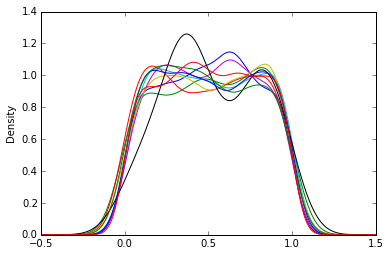

%Of_Household_Income: False


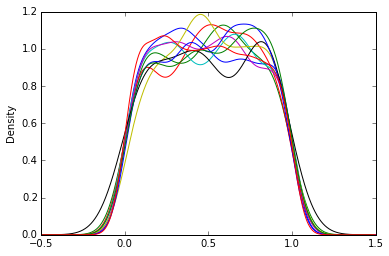

Avg_government_satisfaction: False


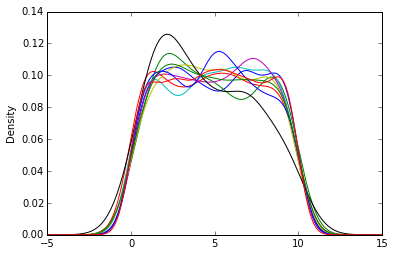

Avg_education_importance: False


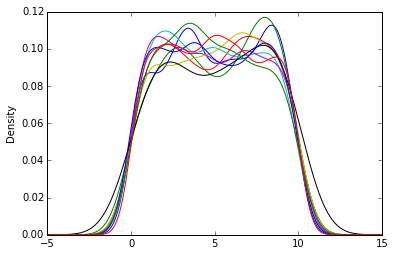

Avg_environmental_importance: False


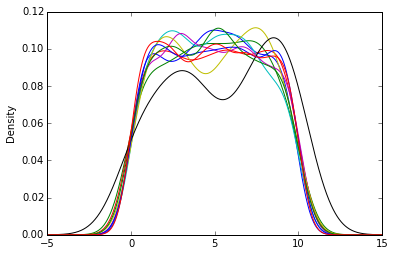

Avg_Satisfaction_with_previous_vote: False


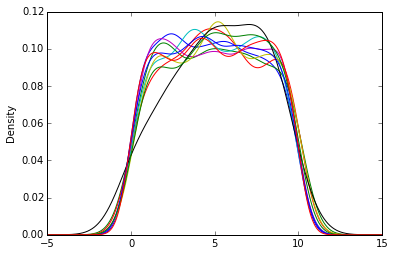

Avg_monthly_income_all_years: False


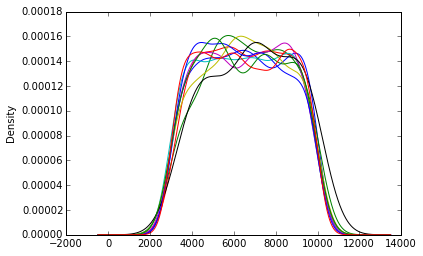

%Time_invested_in_work: False


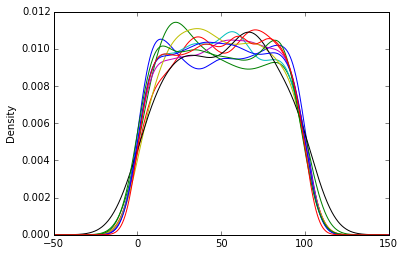

%_satisfaction_financial_policy: False


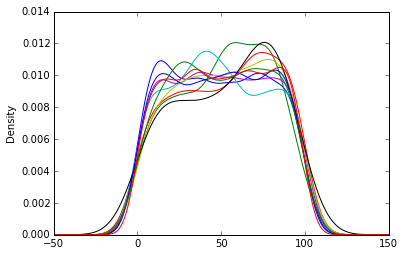

In [46]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
votes=df.Vote.unique()
votes.sort()

for c in all_features:
    if c not in features_to_keep: #only look at features we still have'nt found any reason to keep    
        if c not in discrete_features: # this is only relevant for non-discrete features
            print c + ": " +  str(c in features_to_keep)
            for vote in votes:                                
                df[df.Vote==vote][c].plot(kind='kde')            
            plt.show()
    

Conclusion: no new evidence to keep one of those features (the black one (party 6) seems different sometimes simply because the votes for this party are very little)

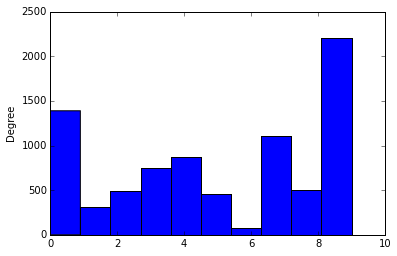

In [47]:
df.Vote.plot(kind='hist')

Avg_monthly_expense_when_under_age_21: True


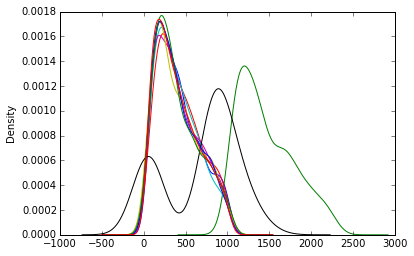

AVG_lottary_expanses: True


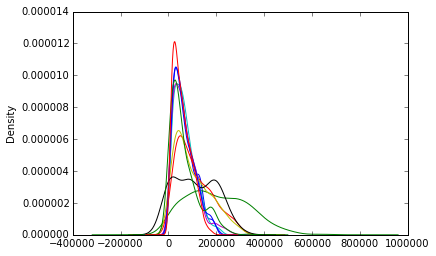

Avg_Residancy_Altitude: True


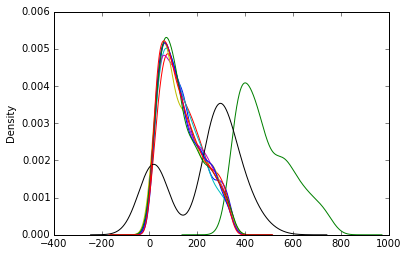

Yearly_ExpensesK: True


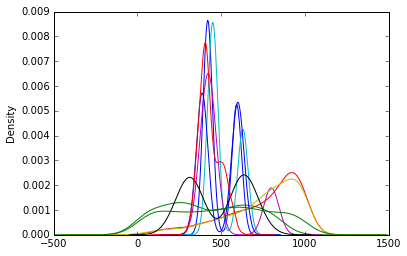

Yearly_IncomeK: True


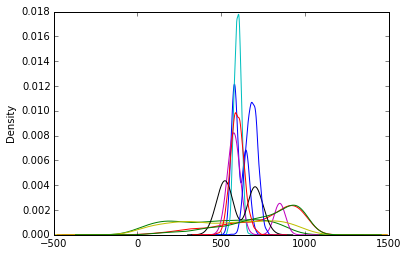

Avg_monthly_expense_on_pets_or_plants: True


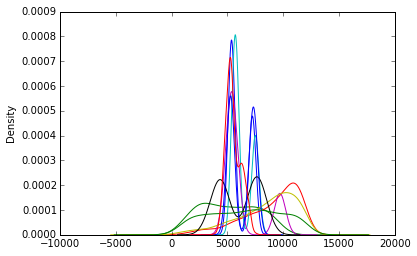

Avg_monthly_household_cost: True


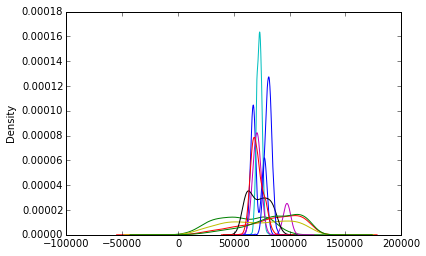

Phone_minutes_10_years: True


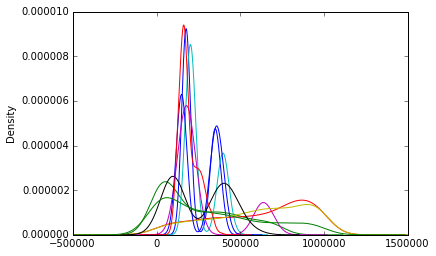

Avg_size_per_room: True


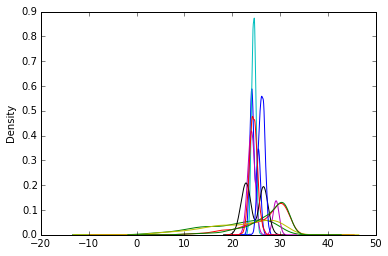

Weighted_education_rank: True


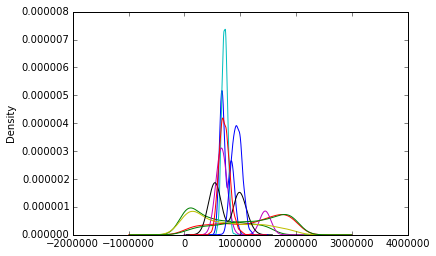

Garden_sqr_meter_per_person_in_residancy_area: True


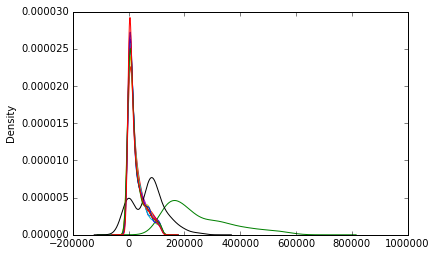

Political_interest_Total_Score: True


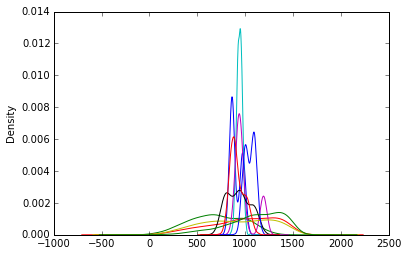

Overall_happiness_score: True


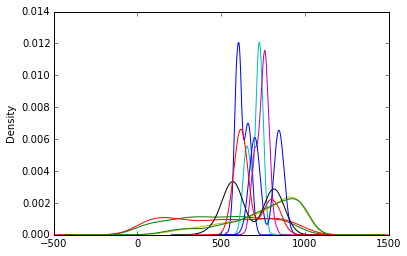

In [48]:
for c in df.columns:
    if c in features_to_keep: # lets see if there are redundant features we decided to keep
        if c not in discrete_features: # this is only relevant for non-discrete features
            print c + ": " +  str(c in features_to_keep)
            for vote in votes:                                
                df[df.Vote==vote][c].plot(kind='kde')            
            plt.show()

Some of them look similar, we will try to remove redundant features.

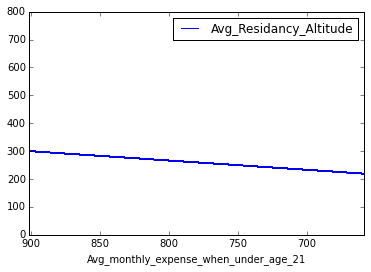

In [49]:
#these 2 look the same
df.plot(x='Avg_monthly_expense_when_under_age_21', y='Avg_Residancy_Altitude')

Yes, they are linearly dependent, so we can drop one of them, and even use it to fill the other one's missing data

#for discrete features, lets compare histograms of votes between different values

Occupation_Satisfaction: False


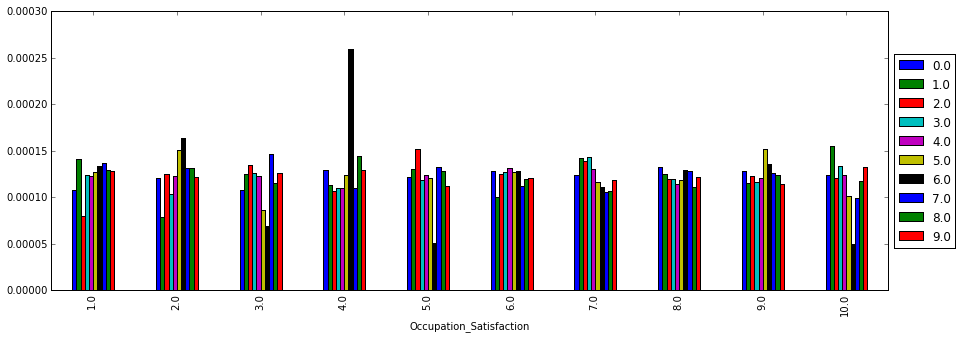

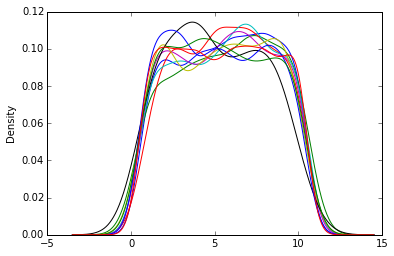

Most_Important_Issue: True


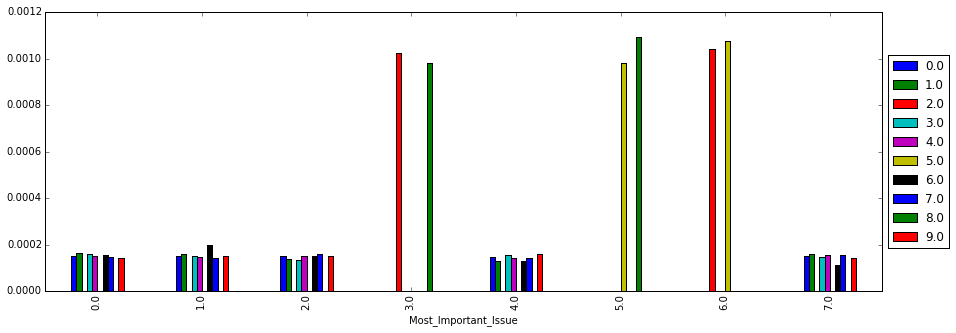

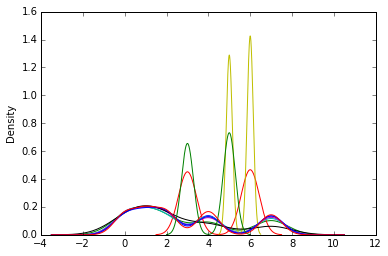

Looking_at_poles_results: True


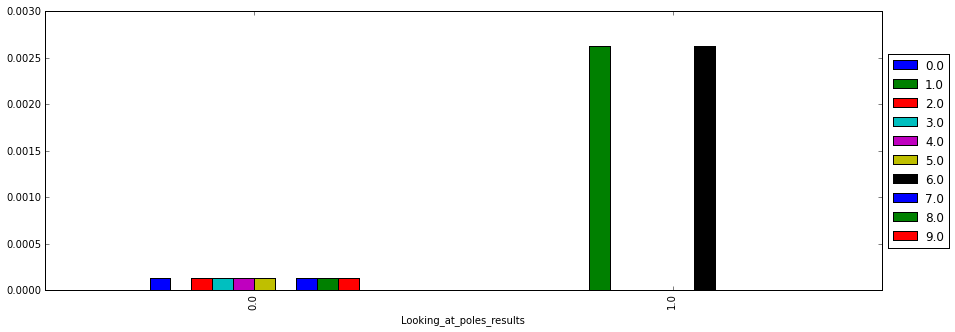

Married: True


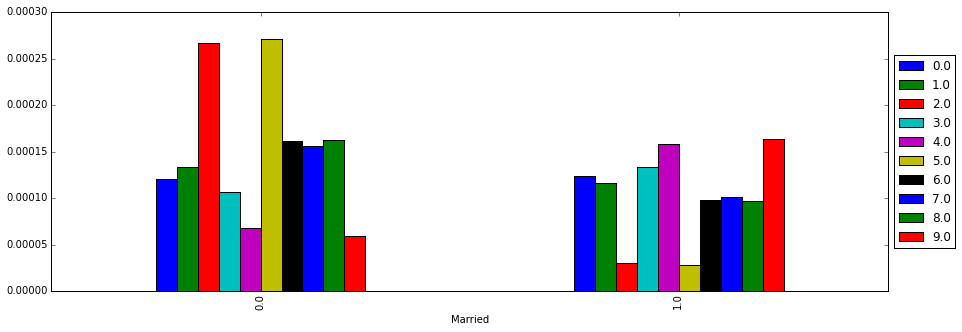

Gender: False


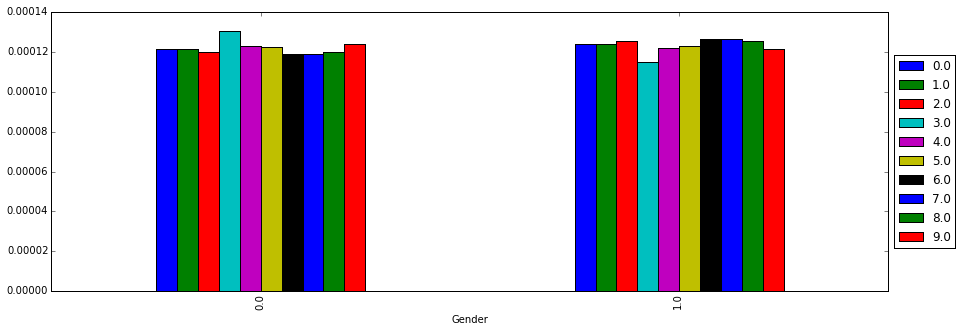

Voting_Time: False


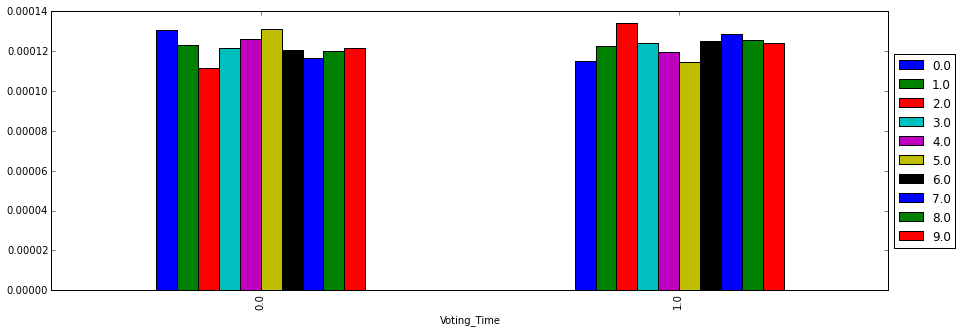

Will_vote_only_large_party: True


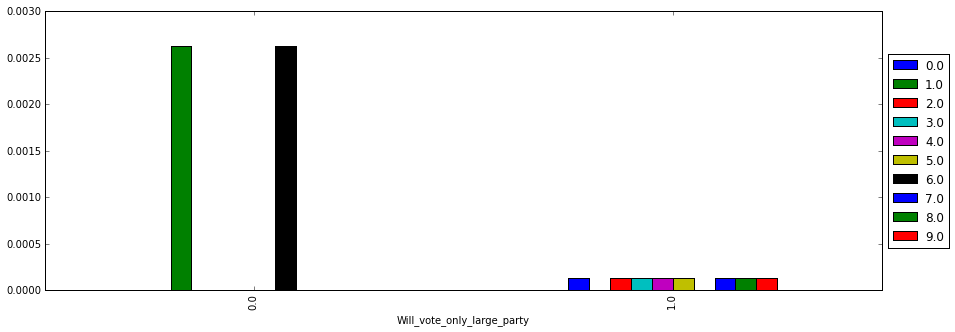

Last_school_grades: True


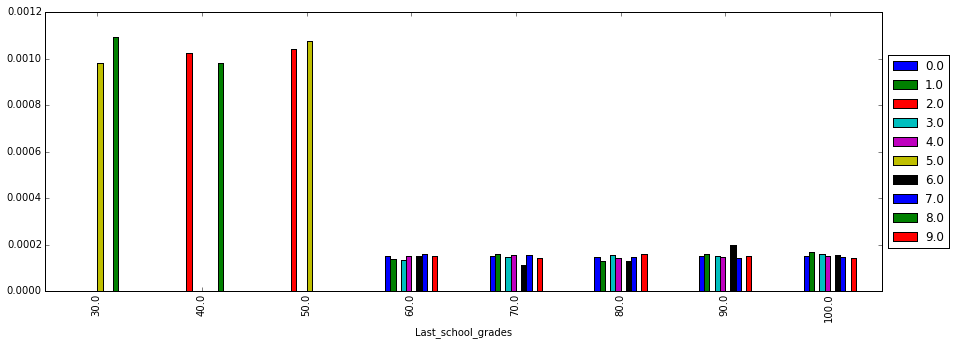

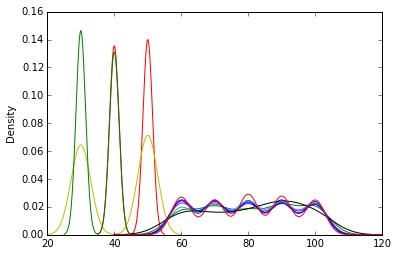

Age_group: False


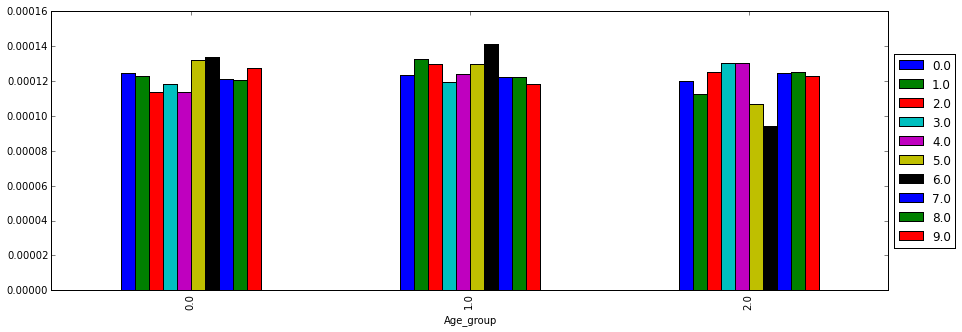

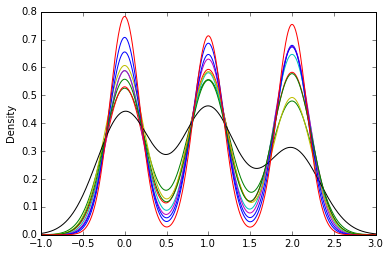

Number_of_differnt_parties_voted_for: False


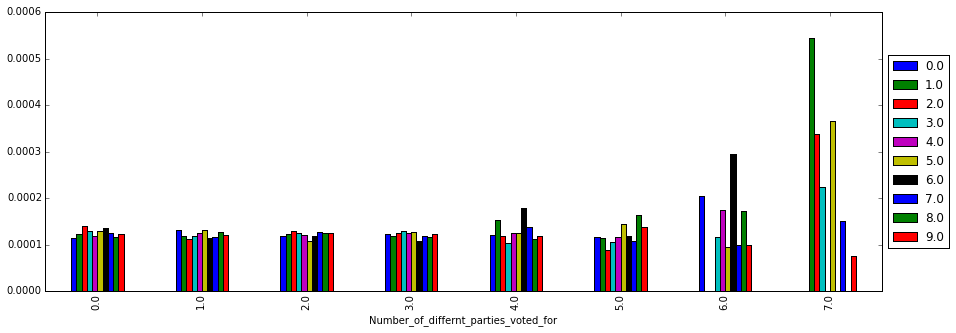

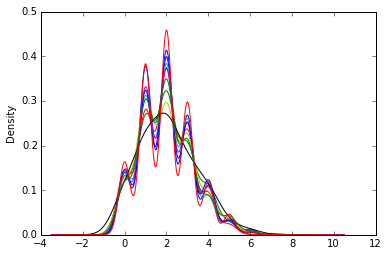

Number_of_valued_Kneset_members: False


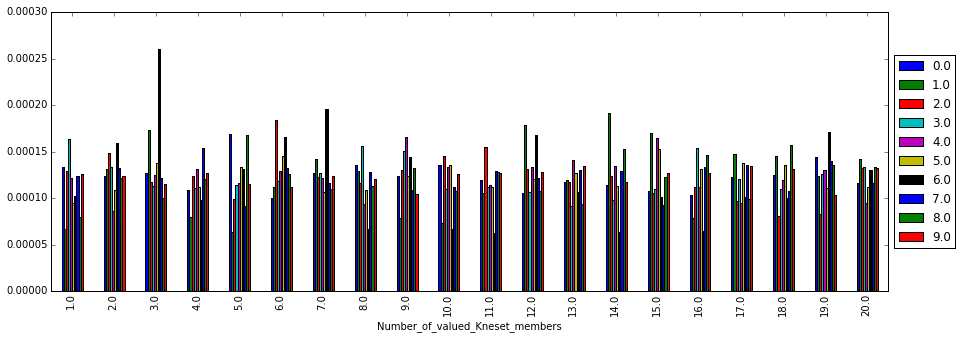

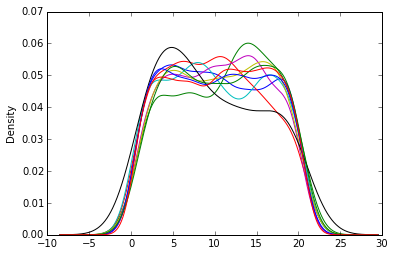

Main_transportation: False


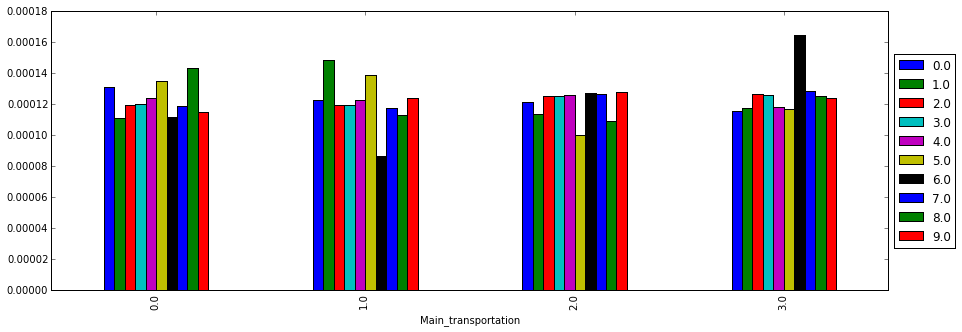

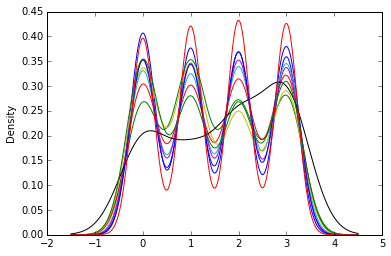

Occupation: False


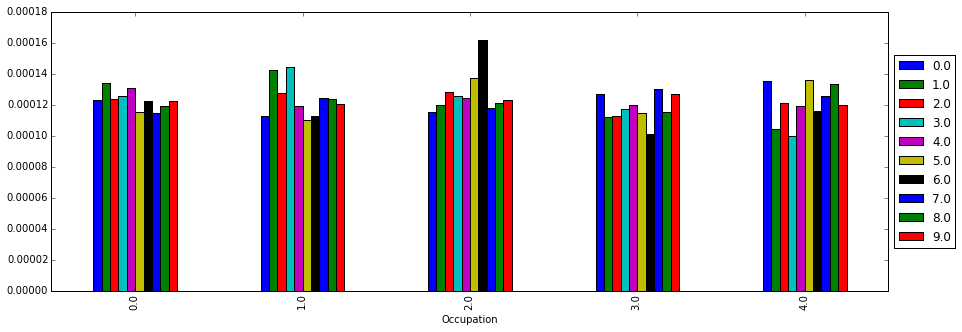

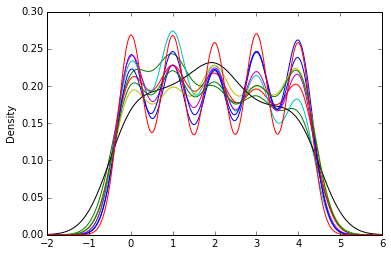

Num_of_kids_born_last_10_years: False


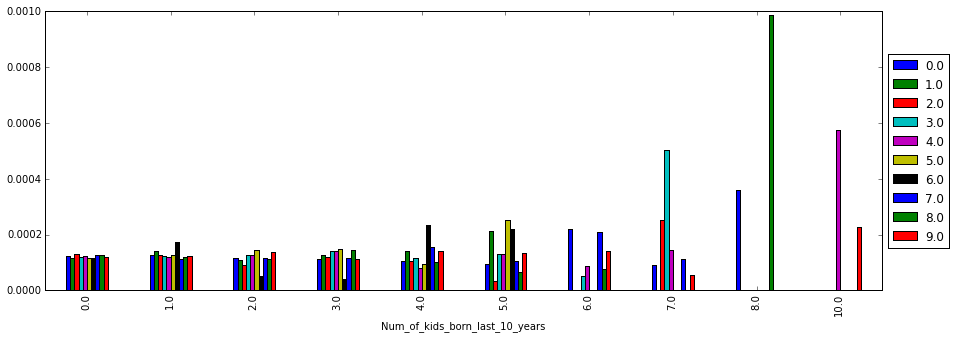

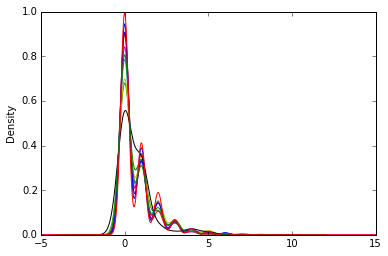

Financial_agenda_matters: True


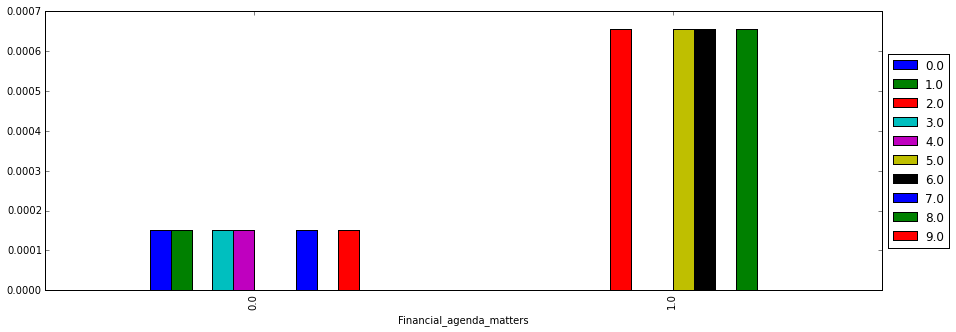

In [50]:
for c in discrete_features:
    print c + ": " +  str(c in features_to_keep)    
    ct = pd.crosstab(df[c], df.Vote)
    ctn=ct.div(ct.sum(axis=1), axis=0).div(ct.sum(axis=0), axis=1) #normalize
    ctn.plot(kind='bar', figsize = (15,5)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()    
    #lets also print the KDEs, maybe it will help    
    if len(df[c].unique())>2:
        for vote in votes:                                        
            df[df.Vote==vote][c].plot(kind='kde')            
    plt.show()

Occupation_Satisfaction- looks different for party 6 when value is 4 and 10, BUT 6 is a very small party, so using this is probably overfitting

Number_of_differnt_parties_voted_for - looks like it does matter, at least for values greater than 4. The qeustion is, do people who voted for a large number of parties tend to vote more for a certain party (party 1 got a very high value with people who voted for 7 different parties) or maybe the histogram looks like this simply because less people have higher values (let's print the histogram), but it doesn't help us predict who will they vote to.
Since the outstanding numbers in the histograms (when exist) are for small parties, and the histograms are very different between the high numbers (the parties with more votes are not consistent) we believe it's just noise.

Num_of_kids_born_last_10_years - same

Last_school_grades - looks like it doesn't matter when 60 or above, we should probably reduce all these values to one. 

Number_of_differnt_parties_voted_for


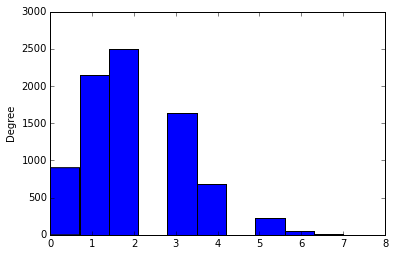

Num_of_kids_born_last_10_years


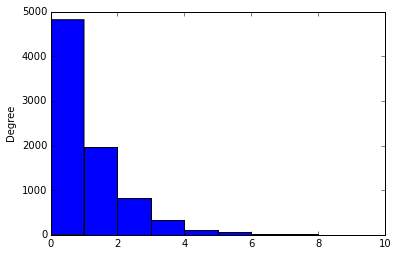

In [25]:
print 'Number_of_differnt_parties_voted_for'
df.Number_of_differnt_parties_voted_for.plot(kind='hist')
plt.show()

print 'Num_of_kids_born_last_10_years'
df.Num_of_kids_born_last_10_years.plot(kind='hist')
plt.show()

So it looks like we were right, and those features are not important, they weren't included anyway.

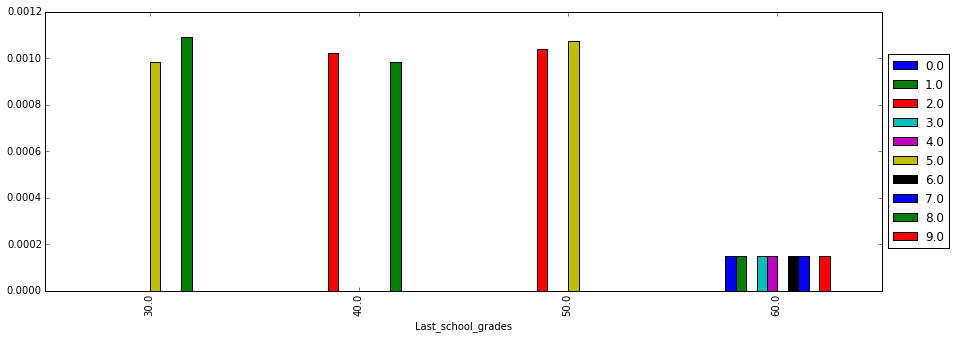

In [26]:
df['Last_school_grades'] = df['Last_school_grades'].map(lambda x: 60 if x >= 60 else x)

c = 'Last_school_grades'
ct = pd.crosstab(df[c], df.Vote)
ctn=ct.div(ct.sum(axis=1), axis=0).div(ct.sum(axis=0), axis=1) #normalize
ctn.plot(kind='bar', figsize = (15,5)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()  